In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()

········


I decided to take most of the columns in the sakila.film table + the film category form the sakila.category table. 
As these values are directly related to the film's contents. I've decided to leave actors out for now as there are 199 distinct actors and Encoding that would lead to a lot of noise. 

In [126]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title AS 'film_title', COUNT(r.rental_date)
FROM sakila.film f
JOIN sakila.inventory i USING(film_id)
JOIN sakila.rental r USING(inventory_id)
JOIN sakila.film_category fc USING(film_id)
JOIN sakila.category c USING(category_id)
WHERE r.rental_date LIKE '%%2005-08%%'
GROUP BY f.title
ORDER BY f.title;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_title,COUNT(r.rental_date)
0,ACADEMY DINOSAUR,9
1,ACE GOLDFINGER,4
2,ADAPTATION HOLES,6
3,AFFAIR PREJUDICE,6
4,AFRICAN EGG,3


In [127]:
data['COUNT(r.rental_date)'].value_counts()

5     137
6     136
3     117
8     110
4     107
7      99
9      85
2      75
10     49
11     24
12     11
1       6
13      2
Name: COUNT(r.rental_date), dtype: int64

In [83]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query_features = '''SELECT f.title AS 'film_title', f.rental_rate, f.rental_duration, f.length, f.rating, f.special_features, c.name AS 'category'
FROM sakila.film f
JOIN sakila.film_category fc USING(film_id)
JOIN sakila.category c USING(category_id)
ORDER BY title;'''

data_features = pd.read_sql_query(query_features, engine)
data_features.head()
data_features.shape

(1000, 7)

In [85]:
data_features.head()

,film_title,rental_rate,rental_duration,length,rating,special_features,category
0,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror
2,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror
4,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family


In [87]:
data_features['rented_aug'] = 0
data_features.head()

,film_title,rental_rate,rental_duration,length,rating,special_features,category,rented_aug
0,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,0
1,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror,0
2,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary,0
3,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror,0
4,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family,0


In [124]:
data_film = data['film_title']
film = []
for title in data['film_title']:
    film.append(title)

In [129]:
features_film = data_features['film_title']
features_film = []
for title in data_features['film_title']:
    features_film.append(title)
features_film

['ACADEMY DINOSAUR',
 'ACE GOLDFINGER',
 'ADAPTATION HOLES',
 'AFFAIR PREJUDICE',
 'AFRICAN EGG',
 'AGENT TRUMAN',
 'AIRPLANE SIERRA',
 'AIRPORT POLLOCK',
 'ALABAMA DEVIL',
 'ALADDIN CALENDAR',
 'ALAMO VIDEOTAPE',
 'ALASKA PHANTOM',
 'ALI FOREVER',
 'ALICE FANTASIA',
 'ALIEN CENTER',
 'ALLEY EVOLUTION',
 'ALONE TRIP',
 'ALTER VICTORY',
 'AMADEUS HOLY',
 'AMELIE HELLFIGHTERS',
 'AMERICAN CIRCUS',
 'AMISTAD MIDSUMMER',
 'ANACONDA CONFESSIONS',
 'ANALYZE HOOSIERS',
 'ANGELS LIFE',
 'ANNIE IDENTITY',
 'ANONYMOUS HUMAN',
 'ANTHEM LUKE',
 'ANTITRUST TOMATOES',
 'ANYTHING SAVANNAH',
 'APACHE DIVINE',
 'APOCALYPSE FLAMINGOS',
 'APOLLO TEEN',
 'ARABIA DOGMA',
 'ARACHNOPHOBIA ROLLERCOASTER',
 'ARGONAUTS TOWN',
 'ARIZONA BANG',
 'ARK RIDGEMONT',
 'ARMAGEDDON LOST',
 'ARMY FLINTSTONES',
 'ARSENIC INDEPENDENCE',
 'ARTIST COLDBLOODED',
 'ATLANTIS CAUSE',
 'ATTACKS HATE',
 'ATTRACTION NEWTON',
 'AUTUMN CROW',
 'BABY HALL',
 'BACKLASH UNDEFEATED',
 'BADMAN DAWN',
 'BAKED CLEOPATRA',
 'BALLOON HOMEWARD

In [150]:
new_film = [x for x in features_film if x not in film]
pd_new_film = pd.DataFrame(new_film)
pd_new_film['count'] = 0
pd_new_film.head()
pd_new_film['film_title'] = pd_new_film[0]
pd_new_film['COUNT(r.rental_date)'] = pd_new_film['count'] 
pd_new_film = pd_new_film.drop([0,'count'],axis=1)
pd_new_film

,film_title,COUNT(r.rental_date)
0,ALICE FANTASIA,0
1,APOLLO TEEN,0
2,ARGONAUTS TOWN,0
3,ARK RIDGEMONT,0
4,ARSENIC INDEPENDENCE,0
5,BOONDOCK BALLROOM,0
6,BUTCH PANTHER,0
7,CATCH AMISTAD,0
8,CHINATOWN GLADIATOR,0
9,CHOCOLATE DUCK,0


In [156]:
pd_new_film.rename(columns={'film_title':'title'})

,title,COUNT(r.rental_date)
0,ALICE FANTASIA,0
1,APOLLO TEEN,0
2,ARGONAUTS TOWN,0
3,ARK RIDGEMONT,0
4,ARSENIC INDEPENDENCE,0
5,BOONDOCK BALLROOM,0
6,BUTCH PANTHER,0
7,CATCH AMISTAD,0
8,CHINATOWN GLADIATOR,0
9,CHOCOLATE DUCK,0


In [167]:
new_data = pd.concat([pd_new_film,data],axis=0)
new_data = new_data.sort_values(by=['film_title'])
new_data = new_data.reset_index()
new_data = new_data.drop(['index'],axis=1)
new_data = new_data.rename(columns={'film_title':'title'})
new_data.head()

,title,COUNT(r.rental_date)
0,ACADEMY DINOSAUR,9
1,ACE GOLDFINGER,4
2,ADAPTATION HOLES,6
3,AFFAIR PREJUDICE,6
4,AFRICAN EGG,3


In [136]:
#data_film = list([data['film_title']])
def rented_aug(x):
    film = []
    for title in data['film_title']:
        film.append(title)
        
    if x in film:
        return 1
    else:
        return 0

data_features['rented_aug'] = data_features['film_title'].apply(rented_aug)
data_features.shape
data.shape

(958, 2)

In [ ]:
if title in 

In [123]:
data_features['rented_aug'].value_counts()

1    958
0     42
Name: rented_aug, dtype: int64

In [169]:
data_cpl = pd.concat([data_features,new_data],axis=1)
data_cpl = data_cpl.drop(['title'],axis=1)
data_cpl['rented_aug']

,film_title,rental_rate,rental_duration,length,rating,special_features,category,rented_aug,COUNT(r.rental_date)
0,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,1,9
1,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror,1,4
2,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary,1,6
3,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror,1,6
4,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family,1,3
...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,0.99,6,183,G,"Trailers,Behind the Scenes",Documentary,1,3
996,YOUTH KICK,0.99,4,179,NC-17,"Trailers,Behind the Scenes",Music,1,3
997,ZHIVAGO CORE,0.99,6,105,NC-17,Deleted Scenes,Horror,1,2
998,ZOOLANDER FICTION,2.99,5,101,R,"Trailers,Deleted Scenes",Children,1,7


In [170]:
data_cpl['COUNT(r.rental_date)'].value_counts()

5     137
6     136
3     117
8     110
4     107
7      99
9      85
2      75
10     49
0      42
11     24
12     11
1       6
13      2
Name: COUNT(r.rental_date), dtype: int64

In [171]:
data_cpl['rented_aug'].value_counts()

1    958
0     42
Name: rented_aug, dtype: int64

In [3]:
#there are no NaN values so no need to drop any rows at this moment. 
data.isna().sum()

film_title          0
rental_rate         0
rental_duration     0
length              0
rating              0
special_features    0
category            0
rental_date         0
rented_aug          0
dtype: int64

In [4]:
data.shape

(16045, 9)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rental_rate,16045.0,2.942509,1.649698,0.99,0.99,2.99,4.99,4.99
rental_duration,16045.0,4.935556,1.401671,3.00,4.00,5.00,6.00,7.00
length,16045.0,114.969274,40.101750,46.00,81.00,114.00,148.00,185.00


In [6]:
#dropping the title as I don't want to take that into any analysis
data_no_title = data.drop(['film_title'],axis=1)

In [7]:
#there are no empty strings or spaces in this dataset, the data is also very balanced over the different values so I am not dropping any rows at this point
data_no_title['rental_rate'].value_counts()
data_no_title['rental_duration'].value_counts()
data_no_title['length'].value_counts().index
data_no_title['rating'].value_counts()
#data_no_title['special_features'].value_counts()
#data['category'].value_counts()
#data['rented_aug'].value_counts()

PG-13    3585
NC-17    3293
PG       3213
R        3181
G        2773
Name: rating, dtype: int64

In [8]:
#I am going to split out the special_features over seperate columns so I can use them to get information about each individual special_features
def trailer(x):
    if 'Trailers' in x:
        return 1
    else:
        return 0

data_no_title['trailer'] = data_no_title['special_features'].apply(trailer)

In [9]:
def deleted_scene(x):
    if 'Deleted Scenes' in x:
        return 1
    else:
        return 0

data_no_title['deleted_scene'] = data_no_title['special_features'].apply(deleted_scene)

In [10]:
def behind_scene(x):
    if 'Behind the Scenes' in x:
        return 1
    else:
        return 0

data_no_title['behind_scenes'] = data_no_title['special_features'].apply(behind_scene)

In [11]:
def commentaries(x):
    if 'Commentaries' in x:
        return 1
    else:
        return 0

data_no_title['commentaries'] = data_no_title['special_features'].apply(commentaries)

#dropping the special_features column as I longer need it now I have the other functions
data_no_title = data_no_title.drop(['special_features'], axis=1)

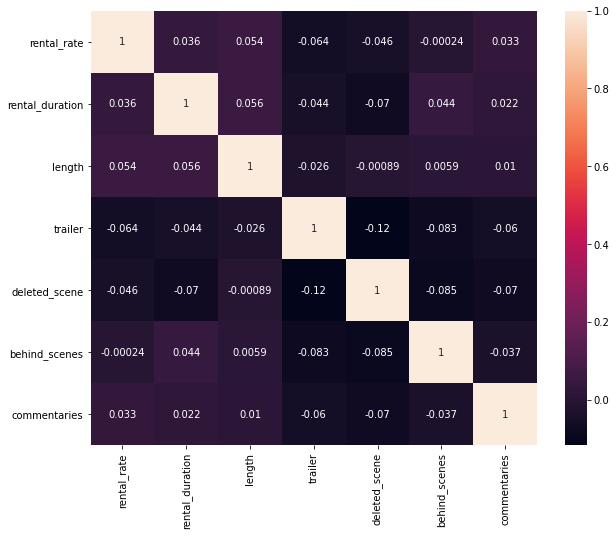

In [12]:
#there is no multicolinearity between the numerical values.
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data_no_title.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

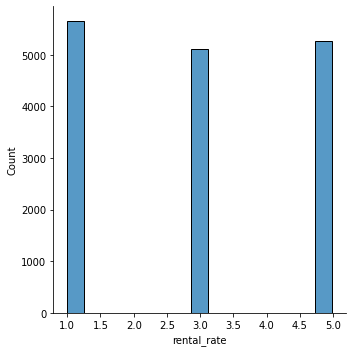

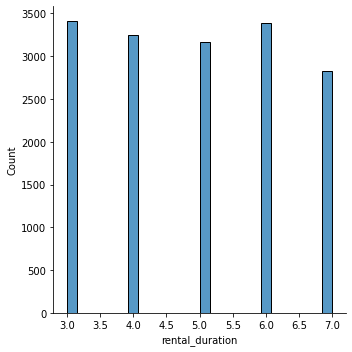

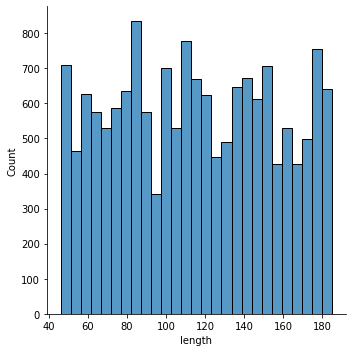

In [13]:
sns.displot(data_no_title['rental_rate'])
plt.show()

sns.displot(data_no_title['rental_duration'])
plt.show()

sns.displot(data_no_title['length'])
plt.show()


In [14]:
#making X-Y split
X = data_no_title.drop(['rented_aug'],axis=1)
y = data_no_title['rented_aug']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#cat/num X-train
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = np.object)

#cat/num X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = np.object)

#Scale X-train
MinMaxTransformer = MinMaxScaler().fit(X_train_num)
X_norm_train = pd.DataFrame(MinMaxTransformer.transform(X_train_num), columns = X_train_num.columns)

#Scale X-test
X_norm_test = pd.DataFrame(MinMaxTransformer.transform(X_test_num), columns = X_test_num.columns)
X_norm_test

/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_5949/1266854406.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include = np.object)
/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_5949/1266854406.py:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)


,rental_rate,rental_duration,length,trailer,deleted_scene,behind_scenes,commentaries
0,0.5,0.25,0.431655,1.0,0.0,0.0,0.0
1,0.0,0.00,0.949640,0.0,1.0,0.0,0.0
2,0.0,0.00,0.654676,1.0,1.0,0.0,0.0
3,0.0,0.25,0.741007,0.0,0.0,0.0,1.0
4,0.0,0.25,0.755396,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
4809,0.5,0.50,0.338129,1.0,0.0,1.0,1.0
4810,0.0,0.25,0.741007,0.0,0.0,0.0,1.0
4811,0.0,0.00,0.266187,1.0,0.0,0.0,1.0
4812,0.5,0.50,0.460432,0.0,0.0,0.0,1.0


In [17]:
from sklearn.preprocessing import OneHotEncoder
# Onehot encoding
encoder = OneHotEncoder().fit(X_train_cat)

# encode training data
train_encoded = encoder.transform(X_train_cat).toarray()

train_encoded_columns = list()
train_dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            train_dropped_columns.append(column)
            train_encoded_columns.append(column)
            condition = False
        else:
            train_encoded_columns.append(column)

train_cat_encoded = pd.DataFrame(data = train_encoded, columns=train_encoded_columns)
train_cat_encoded = train_cat_encoded.drop(columns = train_dropped_columns)


In [18]:
# encode test data
test_encoded = encoder.transform(X_test_cat).toarray()

test_encoded_columns = list()
test_dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            test_dropped_columns.append(column)
            test_encoded_columns.append(column)
            condition = False
        else:
            test_encoded_columns.append(column)

test_cat_encoded = pd.DataFrame(data = test_encoded, columns=test_encoded_columns)
test_cat_encoded = test_cat_encoded.drop(columns = test_dropped_columns)
test_cat_encoded

,NC-17,PG,PG-13,R,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4810,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
#merging the data and training set with encoded and normalized values and the dropped special_features
# Training data first
X_train_nrml = pd.concat([X_norm_train,train_cat_encoded], axis = 1)
#X_train_nrml = pd.concat([X_train_nrml,data_no_title[['trailer','deleted_scene','behind_scenes','commentaries']]], axis = 1)
X_train_nrml

,rental_rate,rental_duration,length,trailer,deleted_scene,behind_scenes,commentaries,NC-17,PG,PG-13,...,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,1.0,0.25,0.690647,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.273381,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.50,0.007194,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.75,0.805755,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.50,0.230216,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,0.0,0.50,0.208633,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11227,1.0,0.50,0.381295,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11228,0.5,0.75,0.136691,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11229,1.0,0.25,0.467626,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
#merging test data
X_test_nrml = pd.concat([X_norm_test,test_cat_encoded], axis = 1)

In [60]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train_nrml, y_train)

In [61]:
predictions = classification.predict(X_test_nrml)
classification.score(X_test_nrml, y_test)

0.6427087660988783

In [62]:
predictions

array(['False', 'False', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions,y_test)

array([[3094, 1720],
       [   0,    0]])

In [24]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_nrml, y_train)
predictions_clf = clf.predict(X_test_nrml)
clf.score(X_test_nrml, y_test)

0.5596177814707104

In [25]:
#without splitting first
X2 = data_no_title.select_dtypes(include = np.number)

# Scaling data
transformer2 = MinMaxScaler().fit(X2)
x_normalized = transformer2.transform(X2)
x2 = pd.DataFrame(x_normalized)
x2

,0,1,2,3,4,5,6
0,0.0,0.75,0.287770,0.0,1.0,1.0,0.0
1,0.0,0.75,0.287770,0.0,1.0,1.0,0.0
2,0.0,0.75,0.287770,0.0,1.0,1.0,0.0
3,0.0,0.75,0.287770,0.0,1.0,1.0,0.0
4,0.0,0.75,0.287770,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
16040,1.0,0.00,0.028777,1.0,0.0,1.0,1.0
16041,1.0,0.00,0.028777,1.0,0.0,1.0,1.0
16042,1.0,0.00,0.028777,1.0,0.0,1.0,1.0
16043,1.0,0.00,0.028777,1.0,0.0,1.0,1.0


In [30]:
X2_cat = data_no_title.select_dtypes(include = np.object)
encoder2 = OneHotEncoder().fit(X2_cat)
encoded2 = encoder2.transform(X2_cat).toarray()

encoded_columns = list()
dropped_columns = list()

for columns in encoder2.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            dropped_columns.append(column)
            encoded_columns.append(column)
            condition = False
        else:
            encoded_columns.append(column)

cat_encoded = pd.DataFrame(data = encoded2, columns=encoded_columns)
cat_encoded = cat_encoded.drop(columns = dropped_columns)
cat_encoded

/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_5949/968575869.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X2_cat = data_no_title.select_dtypes(include = np.object)


,NC-17,PG,PG-13,R,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel,True
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16041,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X2 = pd.concat([x2,cat_encoded], axis = 1)
y2 = data_no_title['rented_aug']
X2

,0,1,2,3,4,5,6,NC-17,PG,PG-13,...,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel,True
0,0.0,0.75,0.287770,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.75,0.287770,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.75,0.287770,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.75,0.287770,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.75,0.287770,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,1.0,0.00,0.028777,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16041,1.0,0.00,0.028777,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16042,1.0,0.00,0.028777,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16043,1.0,0.00,0.028777,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
# classification = LogisticRegression(random_state=0, solver='lbfgs',
#                   multi_class='multinomial').fit(X_train2, y_train2)

In [46]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train2, y_train2)

In [47]:
predictions2 = classification.predict(X_test2)
classification.score(X_test2, y_test2)

1.0

In [53]:
predictions.info

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, predictions2)

array([[3094,    0],
       [   0, 1720]])

In [49]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X2, y2)
predictions_clf = clf.predict(X_test2)
clf.score(X_test2, y_test2)

0.9904445367677607